In [1]:
from __future__ import print_function
import IPython
import sys
import numpy as np
np.random.seed(1337)
import os
os.environ['PYTHONHASHSEED'] = '0'
import random
random.seed(12345)
from keras.models import Sequential,Model
from keras.layers import *
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
import pandas as pd
import io
import tensorflow as tf
tf.set_random_seed(1234)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)
import csv
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.graph_objs as go

c:\users\yuner\anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.models import load_model
#keras.metrics.custom_metrics = {'accurate_rate':accurate_rate,'accuracy':accuracy}
model = load_model('model2.h5')

In [56]:
mse=[]
mae=[]
for i in range(10):
    sample_index=np.unique(np.random.randint(93,size=15))[:10]
    predicts=model.predict(X_[sample_index])
    predicts[sampleweights[sample_index]==0,:]=0
    y_real=Y[sample_index]
    y_real=y_real.reshape(200)
    predicts=predicts.reshape(200)[y_real!=0]
    y_real=y_real[y_real!=0]
    mse.append(np.mean(np.power(np.abs(predicts-y_real),2)))
    mae.append(np.mean(np.abs(predicts-y_real)))

In [57]:
print(np.mean(mse))
print(np.mean(mae))

0.16359518999651648
0.284948459259441


In [49]:
model.test_on_batch(X_,Y,sample_weight=sampleweights)

0.307164

In [50]:
predicts=model.predict(X_)
predicts[sampleweights==0,:]=0

In [51]:
Y_=Y.reshape(20*93)
predicts_=predicts.reshape(20*93)[Y_!=0]
Y_=Y_[Y_!=0]

In [ ]:
print(predicts_-Y_)
print(Y_)

0.18214375913999925


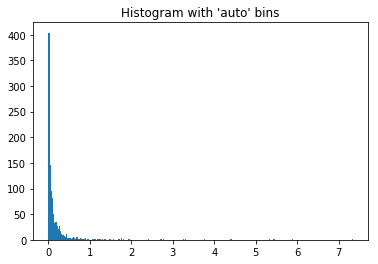

In [52]:
import matplotlib.pyplot as plt
diff=np.power(np.abs(predicts_-Y_),2)
#diff=diff.reshape(1860)
print(np.mean(diff))
plt.hist(diff, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

0.30048047967288727


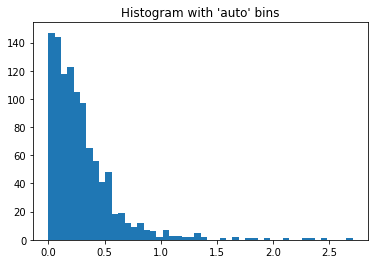

In [53]:
diff=np.power(np.abs(predicts_-Y_),1)
#diff=diff.reshape(1860)
print(np.mean(diff))
plt.hist(diff, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

In [2]:
reader2=csv.reader(open('LSTM_data_disciplines.csv','r'))
reader3=csv.reader(open('LSTM_data_journals.csv','r'))
reader4=csv.reader(open('LSTM_JIF.csv','r'))
reader5=csv.reader(open('LSTM_data_2_count.csv','r'))
reader6=csv.reader(open('LSTM_coindex.csv','r'))
reader1=csv.reader(open('LSTM_data_2_portion.csv','r'))

In [3]:
discipline_dic={}
for line in reader2:
  discipline_dic[line[1]]=int(line[0])

In [4]:
max(discipline_dic.values())

211

In [5]:
journals_dic={}
for line in reader3:
  journals_dic[line[1]]=int(line[0])

In [6]:
psy_list=[i for i in discipline_dic.keys() if 'PSYCHOLOGY' in i ]

In [7]:
psy_index=[]
for i in psy_list:
  psy_index.append(discipline_dic[i]-1)

In [8]:
X2=np.zeros((93,20,211))

In [9]:
for line in reader5:
  index1=journals_dic[line[1]]-1
  index2=int(line[0])-1997
  index3=discipline_dic[line[2]]-1
  X2[index1,index2,index3]=float(line[3])

In [10]:
COMM=X2[:,:,20]
PSY=X2[:,:,psy_index]
PSY=np.mean(PSY,axis=2)
BUSINESS=X2[:,:,8]
POL_SCI=X2[:,:,42]
SOCIOLOGY=X2[:,:,10]

In [11]:
COMM=COMM.reshape((93,20,1))
PSY=PSY.reshape((93,20,1))
BUSINESS=BUSINESS.reshape((93,20,1))
POL_SCI=POL_SCI.reshape((93,20,1))
SOCIOLOGY=SOCIOLOGY.reshape((93,20,1))

In [12]:
INTER=X2[:,:,np.delete(np.arange(211),[20,8,42,10]+psy_index)]

In [13]:
co=np.zeros((93,20,1))
for line in reader6:
  if index1 in journals_dic.keys():
    index1=journals_dic[line[1]]-1
    index2=int(line[0])-1997
    co[index1,index2,0]=float(line[2])

In [14]:
Y=np.zeros((93,20,1))
for line in reader4:
  if line[2] in journals_dic.keys():
    index1=journals_dic[line[2]]-1
    index2=int(line[0])-1997
    try:
      Y[index1,index2]=float(line[3])
    except:
      print(line[3])
      break

In [15]:
from sklearn.decomposition import PCA,NMF,TruncatedSVD
import pandas as pd

In [16]:
X_pca=[]
for i in INTER:
  X_pca.extend(i)
X_pca=pd.DataFrame(X_pca)

In [17]:
externs=[0]*211
for discipline in discipline_dic.keys():
  externs[discipline_dic[discipline]-1]=discipline

In [18]:
externs=np.delete(externs,[20,8,42,10]+psy_index)
X_pca.columns=externs

In [19]:
pca = PCA(n_components=6)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37909048 0.1790486  0.10235857 0.07130827 0.04410595 0.03170289]
0.8076147496221735


In [21]:
vectors=pca.components_

In [36]:
ling_eco=X_pca.iloc[:,[0,40]]

In [37]:
np.corrcoef(ling_eco.T)

array([[ 1.        , -0.02807304],
       [-0.02807304,  1.        ]])

In [38]:
np.cov(ling_eco.T)

array([[ 8.67220802, -0.27526858],
       [-0.27526858, 11.08676131]])

In [66]:
print(list(externs).index('ECONOMICS'))
print(list(externs).index('LINGUISTICS'))

40
0


In [125]:
i=1097
test2=X_pca.iloc[i:i+1]
#test[0,40]=10
#test2[0,0]=10
pca.transform(test2)

array([[  6.02634906,  45.23723053, -10.31023065,  20.06392128,
          0.12034572,   1.13633154]])

In [89]:
test=pca.transform(X_pca)
test=pd.DataFrame(test)
test.columns=['Health Science','Eco/Management/Information Science','Linguistics/Anthropology','Economics/Liguistics','Cultural Studies/Education/Multidisciplinary Science','Neural/Behavioral Science']

In [91]:
test.sort_values(by='Economics/Liguistics',ascending=False)

,Health Science,Eco/Management/Information Science,Linguistics/Anthropology,Economics/Liguistics,Cultural Studies/Education/Multidisciplinary Science,Neural/Behavioral Science
1099,6.792594,51.425815,-12.012572,24.189839,-0.015907,1.443752
1097,6.026349,45.237231,-10.310231,20.063921,0.120346,1.136332
1095,6.269215,46.062585,-10.571448,19.775576,-2.849042,1.304156
1094,4.567594,38.839720,-9.881694,19.355789,-3.100812,1.945805
1096,4.187867,35.797508,-8.388246,14.623285,-4.044344,1.670367
1072,-0.079085,14.739764,-6.380511,14.055628,-0.573340,1.501939
1074,-0.045572,14.554470,-5.887818,12.158389,-1.525371,1.168936
1075,-0.009541,14.244184,-5.789508,11.814996,-1.671625,1.200214
1092,3.682327,30.873406,-6.907567,11.219965,-3.730409,1.459632
379,1.769244,0.715017,33.938674,10.930074,-1.896182,0.590886


In [126]:
X_pca.iloc[1097].sort_values(ascending=False)

ECONOMICS                                           46.416667
MANAGEMENT                                          14.000000
INFORMATION SCIENCE & LIBRARY SCIENCE               12.500000
LAW                                                  9.500000
PUBLIC ADMINISTRATION                                7.500000
COMPUTER SCIENCE, INFORMATION SYSTEMS                6.083333
OPERATIONS RESEARCH & MANAGEMENT SCIENCE             3.833333
PLANNING & DEVELOPMENT                               3.666667
GEOGRAPHY                                            3.500000
TELECOMMUNICATIONS                                   3.333333
STATISTICS & PROBABILITY                             2.666667
SOCIAL SCIENCES, MATHEMATICAL METHODS                2.500000
ENVIRONMENTAL STUDIES                                2.416667
ENGINEERING, ELECTRICAL & ELECTRONIC                 1.833333
COMPUTER SCIENCE, SOFTWARE ENGINEERING               1.833333
ENVIRONMENTAL SCIENCES                               1.583333
BUSINESS

In [100]:
1100-93*11

77

In [96]:
journals_dic

{'African Journalism Studies': 70,
 'Argumentation': 1,
 'Asian Journal of Communication': 73,
 'Augmentative and Alternative Communication': 89,
 'COMMUNICATION EDUCATION': 83,
 'COMMUNICATION MONOGRAPHS': 2,
 'COMMUNICATION RESEARCH': 33,
 'COMMUNICATION THEORY': 37,
 'CRITICAL STUDIES IN MASS COMMUNICATION': 81,
 'CRITICAL STUDIES IN MEDIA COMMUNICATION': 46,
 'CYBERPSYCHOLOGY & BEHAVIOR': 88,
 'Chinese Journal of Communication': 57,
 'Communication Culture & Critique': 62,
 'Communication and Critical-Cultural Studies': 69,
 'Communications-European Journal of Communication Research': 20,
 'Comunicacion y Sociedad': 92,
 'Comunicar': 27,
 'Continuum-Journal of Media & Cultural Studies': 21,
 'Convergence-The International Journal of Research into New Media Technologies': 50,
 'Critical Discourse Studies': 8,
 'DISCOURSE & SOCIETY': 64,
 'DISCOURSE STUDIES': 6,
 'Discourse & Communication': 10,
 'Discourse Context & Media': 26,
 'EUROPEAN JOURNAL OF COMMUNICATION': 14,
 'EUROPEAN JO

In [80]:
pca.transform(test)

array([[-1.815291  , -1.17731752,  8.04157629,  3.69204127, -2.21082401,
        -0.21062219]])

In [72]:
for i in range(6):
  print('Component',i+1,':')
  print('\n'.join(np.flip(np.array(externs)[np.argsort(pca.components_[i,:])[-5:]],0)))
  print('-----------------------------')

Component 1 :
PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH
MEDICINE, GENERAL & INTERNAL
PSYCHIATRY
ONCOLOGY
NURSING
-----------------------------
Component 2 :
ECONOMICS
MANAGEMENT
INFORMATION SCIENCE & LIBRARY SCIENCE
COMPUTER SCIENCE, INFORMATION SYSTEMS
SOCIAL SCIENCES, INTERDISCIPLINARY
-----------------------------
Component 3 :
LINGUISTICS
ANTHROPOLOGY
EDUCATION & EDUCATIONAL RESEARCH
MANAGEMENT
SOCIAL SCIENCES, INTERDISCIPLINARY
-----------------------------
Component 4 :
ECONOMICS
LINGUISTICS
PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH
ONCOLOGY
NURSING
-----------------------------
Component 5 :
CULTURAL STUDIES
EDUCATION & EDUCATIONAL RESEARCH
SOCIAL SCIENCES, INTERDISCIPLINARY
INFORMATION SCIENCE & LIBRARY SCIENCE
MULTIDISCIPLINARY SCIENCES
-----------------------------
Component 6 :
PSYCHIATRY
NEUROSCIENCES
FAMILY STUDIES
CLINICAL NEUROLOGY
REHABILITATION
-----------------------------


In [83]:
X_pca_=pca.transform(X_pca)
X_pca_=X_pca_.reshape((93,20,6))

In [21]:
X_pca_[X2.sum(axis=2)==0,:]=0

In [22]:
X_=np.concatenate((X_pca_,COMM,PSY,BUSINESS,POL_SCI,SOCIOLOGY,co),axis=2)

In [23]:
sample_index=np.unique(np.random.randint(93,size=15))[:10]

In [24]:
X_test=X_[sample_index]
y_test=Y[sample_index]

In [25]:
train_index=np.delete(np.arange(93),sample_index)
X_train=X_[train_index]
y_train=Y[train_index]

In [26]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(10, 20, 12)
(10, 20, 1)
(83, 20, 12)
(83, 20, 1)


In [4]:
def accurate_rate(y_true, y_pred):
  diff=tf.to_float(K.abs(y_pred-y_true))/tf.to_float(y_true)
  correct=K.less(diff,0.3)
  return K.mean(correct)

def accuracy(y_true, y_pred):
  abs_diff=K.abs(y_pred-y_true)
  correct=K.less(abs_diff,0.3)
  return K.mean(correct)

In [27]:
sampleweights=np.zeros((93,20))
sampleweights[X2.sum(axis=2)==0]=0
sampleweights[X2.sum(axis=2)!=0]=1

In [28]:
def creat_model(n_a,n_values):
  model=Sequential()
  model.add(Masking(mask_value=0., input_shape=(20,n_values)))
  #model.add(Embedding(input_dim=1000, output_dim=128, input_length=10))
  #model.add(LSTM(n_a, activation='tanh',return_sequences=True,dropout=0.1))
  model.add(SimpleRNN(n_a, activation='tanh',return_sequences=True))
  #model.add(GRU(n_a, activation='tanh',return_sequences=True))
  model.add(Dense(10))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.1))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',sample_weight_mode="temporal", optimizer='sgd')
  return model

In [29]:
model=creat_model(11,12)
for i in range(2):
    model.fit(X_,Y,epochs=1000,sample_weight=sampleweights,shuffle=False)
loss2=model.test_on_batch(X_test,y_test,sample_weight=sampleweights[sample_index])
print(loss2)

Epoch 1/1000
93/93 [==============================] - 0s 3ms/step - loss: 1.3491
Epoch 2/1000
93/93 [==============================] - 0s 270us/step - loss: 1.0140
Epoch 3/1000
93/93 [==============================] - 0s 226us/step - loss: 0.8757
Epoch 4/1000
93/93 [==============================] - 0s 248us/step - loss: 0.8399
Epoch 5/1000
93/93 [==============================] - 0s 205us/step - loss: 0.8184
Epoch 6/1000
93/93 [==============================] - 0s 248us/step - loss: 0.7862
Epoch 7/1000
93/93 [==============================] - 0s 221us/step - loss: 0.8094
Epoch 8/1000
93/93 [==============================] - 0s 216us/step - loss: 0.7731
Epoch 9/1000
93/93 [==============================] - 0s 237us/step - loss: 0.7643
Epoch 10/1000
93/93 [==============================] - 0s 232us/step - loss: 0.7506
Epoch 11/1000
93/93 [==============================] - 0s 216us/step - loss: 0.7498
Epoch 12/1000
93/93 [==============================] - 0s 237us/step - loss: 0.7391
Epo

93/93 [==============================] - 0s 280us/step - loss: 0.5196
Epoch 195/1000
93/93 [==============================] - 0s 221us/step - loss: 0.5170
Epoch 196/1000
93/93 [==============================] - 0s 237us/step - loss: 0.5205
Epoch 197/1000
93/93 [==============================] - 0s 226us/step - loss: 0.5054
Epoch 198/1000
93/93 [==============================] - 0s 259us/step - loss: 0.5171
Epoch 199/1000
93/93 [==============================] - 0s 351us/step - loss: 0.5231
Epoch 200/1000
93/93 [==============================] - 0s 280us/step - loss: 0.5290
Epoch 201/1000
93/93 [==============================] - 0s 248us/step - loss: 0.5366
Epoch 202/1000
93/93 [==============================] - 0s 291us/step - loss: 0.5113
Epoch 203/1000
93/93 [==============================] - 0s 270us/step - loss: 0.5196
Epoch 204/1000
93/93 [==============================] - 0s 248us/step - loss: 0.5131
Epoch 205/1000
93/93 [==============================] - 0s 237us/step - loss: 0.

93/93 [==============================] - 0s 237us/step - loss: 0.4790
Epoch 387/1000
93/93 [==============================] - 0s 216us/step - loss: 0.4696
Epoch 388/1000
93/93 [==============================] - 0s 254us/step - loss: 0.4781
Epoch 389/1000
93/93 [==============================] - 0s 205us/step - loss: 0.4731
Epoch 390/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4924
Epoch 391/1000
93/93 [==============================] - 0s 243us/step - loss: 0.4768
Epoch 392/1000
93/93 [==============================] - 0s 210us/step - loss: 0.4700
Epoch 393/1000
93/93 [==============================] - 0s 280us/step - loss: 0.4733
Epoch 394/1000
93/93 [==============================] - 0s 248us/step - loss: 0.4838
Epoch 395/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4608
Epoch 396/1000
93/93 [==============================] - 0s 248us/step - loss: 0.4750
Epoch 397/1000
93/93 [==============================] - 0s 248us/step - loss: 0.

93/93 [==============================] - 0s 237us/step - loss: 0.4540
Epoch 579/1000
93/93 [==============================] - 0s 248us/step - loss: 0.4411
Epoch 580/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4601
Epoch 581/1000
93/93 [==============================] - 0s 210us/step - loss: 0.4453
Epoch 582/1000
93/93 [==============================] - 0s 270us/step - loss: 0.4421
Epoch 583/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4409
Epoch 584/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4516
Epoch 585/1000
93/93 [==============================] - 0s 221us/step - loss: 0.4564
Epoch 586/1000
93/93 [==============================] - 0s 243us/step - loss: 0.4390
Epoch 587/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4362
Epoch 588/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4497
Epoch 589/1000
93/93 [==============================] - 0s 253us/step - loss: 0.

93/93 [==============================] - 0s 234us/step - loss: 0.4231
Epoch 771/1000
93/93 [==============================] - 0s 270us/step - loss: 0.4428
Epoch 772/1000
93/93 [==============================] - 0s 323us/step - loss: 0.4164
Epoch 773/1000
93/93 [==============================] - 0s 243us/step - loss: 0.4226
Epoch 774/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4238
Epoch 775/1000
93/93 [==============================] - ETA: 0s - loss: 0.324 - 0s 237us/step - loss: 0.4190
Epoch 776/1000
93/93 [==============================] - 0s 237us/step - loss: 0.4186
Epoch 777/1000
93/93 [==============================] - 0s 264us/step - loss: 0.4230
Epoch 778/1000
93/93 [==============================] - 0s 270us/step - loss: 0.4179
Epoch 779/1000
93/93 [==============================] - 0s 237us/step - loss: 0.4096
Epoch 780/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4161
Epoch 781/1000
93/93 [==============================] - 

Epoch 866/1000
93/93 [==============================] - ETA: 0s - loss: 0.327 - 0s 248us/step - loss: 0.4055
Epoch 867/1000
93/93 [==============================] - 0s 243us/step - loss: 0.4088
Epoch 868/1000
93/93 [==============================] - 0s 270us/step - loss: 0.4116
Epoch 869/1000
93/93 [==============================] - 0s 237us/step - loss: 0.4013
Epoch 870/1000
93/93 [==============================] - 0s 253us/step - loss: 0.4171
Epoch 871/1000
93/93 [==============================] - 0s 286us/step - loss: 0.4213
Epoch 872/1000
93/93 [==============================] - 0s 259us/step - loss: 0.4194
Epoch 873/1000
93/93 [==============================] - 0s 248us/step - loss: 0.4204
Epoch 874/1000
93/93 [==============================] - 0s 253us/step - loss: 0.4146
Epoch 875/1000
93/93 [==============================] - 0s 253us/step - loss: 0.4134
Epoch 876/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3939
Epoch 877/1000
93/93 [===================

93/93 [==============================] - 0s 248us/step - loss: 0.3970
Epoch 963/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3853
Epoch 964/1000
93/93 [==============================] - 0s 226us/step - loss: 0.4055
Epoch 965/1000
93/93 [==============================] - 0s 313us/step - loss: 0.4055
Epoch 966/1000
93/93 [==============================] - 0s 280us/step - loss: 0.4131
Epoch 967/1000
93/93 [==============================] - 0s 253us/step - loss: 0.4030
Epoch 968/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3984
Epoch 969/1000
93/93 [==============================] - 0s 248us/step - loss: 0.4099
Epoch 970/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3995
Epoch 971/1000
93/93 [==============================] - 0s 237us/step - loss: 0.3995
Epoch 972/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3946
Epoch 973/1000
93/93 [==============================] - 0s 270us/step - loss: 0.

93/93 [==============================] - 0s 264us/step - loss: 0.3917
Epoch 60/1000
93/93 [==============================] - 0s 226us/step - loss: 0.3913
Epoch 61/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3845
Epoch 62/1000
93/93 [==============================] - 0s 243us/step - loss: 0.4108
Epoch 63/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3851
Epoch 64/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3918
Epoch 65/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3863
Epoch 66/1000
93/93 [==============================] - 0s 275us/step - loss: 0.3906
Epoch 67/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3978
Epoch 68/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3960
Epoch 69/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3852
Epoch 70/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3850
Epoch 

93/93 [==============================] - 0s 302us/step - loss: 0.3755
Epoch 157/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3807
Epoch 158/1000
93/93 [==============================] - 0s 226us/step - loss: 0.3833
Epoch 159/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3740
Epoch 160/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3835
Epoch 161/1000
93/93 [==============================] - 0s 275us/step - loss: 0.3955
Epoch 162/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3904
Epoch 163/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3975
Epoch 164/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3879
Epoch 165/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3683
Epoch 166/1000
93/93 [==============================] - 0s 323us/step - loss: 0.3827
Epoch 167/1000
93/93 [==============================] - 0s 280us/step - loss: 0.

93/93 [==============================] - 0s 280us/step - loss: 0.3655
Epoch 349/1000
93/93 [==============================] - 0s 254us/step - loss: 0.3752
Epoch 350/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3745
Epoch 351/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3611
Epoch 352/1000
93/93 [==============================] - 0s 275us/step - loss: 0.3699
Epoch 353/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3673
Epoch 354/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3607
Epoch 355/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3742
Epoch 356/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3604
Epoch 357/1000
93/93 [==============================] - 0s 281us/step - loss: 0.3670
Epoch 358/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3629
Epoch 359/1000
93/93 [==============================] - 0s 259us/step - loss: 0.

93/93 [==============================] - 0s 226us/step - loss: 0.3542
Epoch 541/1000
93/93 [==============================] - 0s 286us/step - loss: 0.3465
Epoch 542/1000
93/93 [==============================] - 0s 221us/step - loss: 0.3561
Epoch 543/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3505
Epoch 544/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3481
Epoch 545/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3559
Epoch 546/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3422
Epoch 547/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3634
Epoch 548/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3506
Epoch 549/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3520
Epoch 550/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3487
Epoch 551/1000
93/93 [==============================] - 0s 334us/step - loss: 0.

93/93 [==============================] - 0s 244us/step - loss: 0.3384
Epoch 732/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3521
Epoch 733/1000
93/93 [==============================] - 0s 237us/step - loss: 0.3410
Epoch 734/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3336
Epoch 735/1000
93/93 [==============================] - 0s 275us/step - loss: 0.3342
Epoch 736/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3350
Epoch 737/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3315
Epoch 738/1000
93/93 [==============================] - 0s 291us/step - loss: 0.3399
Epoch 739/1000
93/93 [==============================] - 0s 259us/step - loss: 0.3267
Epoch 740/1000
93/93 [==============================] - 0s 302us/step - loss: 0.3397
Epoch 741/1000
93/93 [==============================] - 0s 264us/step - loss: 0.3348
Epoch 742/1000
93/93 [==============================] - 0s 307us/step - loss: 0.

93/93 [==============================] - 0s 248us/step - loss: 0.3355
Epoch 924/1000
93/93 [==============================] - 0s 243us/step - loss: 0.3149
Epoch 925/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3139
Epoch 926/1000
93/93 [==============================] - 0s 248us/step - loss: 0.3326
Epoch 927/1000
93/93 [==============================] - 0s 280us/step - loss: 0.3235
Epoch 928/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3323
Epoch 929/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3153
Epoch 930/1000
93/93 [==============================] - 0s 313us/step - loss: 0.3293
Epoch 931/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3178
Epoch 932/1000
93/93 [==============================] - 0s 270us/step - loss: 0.3196
Epoch 933/1000
93/93 [==============================] - 0s 313us/step - loss: 0.3173
Epoch 934/1000
93/93 [==============================] - 0s 280us/step - loss: 0.

In [38]:
trylist=np.zeros((1,20,12))
test=np.array(model.predict(trylist))
initial=test[0,0,0]
bias=[]
plot_x=np.linspace(0.1,40,num=400)
margin2=np.zeros((12,400))
for j in range(400):
  value=plot_x[j]
  for i in range(12):
    trylist=np.zeros((1,20,12))
    trylist[0,0,i]=value
    test=np.array(model.predict(trylist))[0,0,0]
    margin2[i,j]=test-initial
    if j==0:
        bias.append(margin2[i,j])
    margin2[i,j]-=bias[i]

In [42]:
np.mean(bias+initial)

0.8943989177544912

In [9]:
import plotly.plotly as py
from plotly import tools

py.sign_in('juniorzhu', '2DYGYXxF5dqnhzYH2CP9')

In [39]:
trace1=go.Scatter(x=plot_x,y=margin2[0],mode='line',name='parameter1')
trace2=go.Scatter(x=plot_x,y=margin2[1],mode='line',name='parameter2')
trace3=go.Scatter(x=plot_x,y=margin2[2],mode='line',name='parameter3')
trace4=go.Scatter(x=plot_x,y=margin2[3],mode='line',name='parameter4')
trace5=go.Scatter(x=plot_x,y=margin2[4],mode='line',name='parameter5')
trace6=go.Scatter(x=plot_x,y=margin2[5],mode='line',name='parameter6')
trace7=go.Scatter(x=plot_x,y=margin2[6],mode='line',name='parameter7')
trace8=go.Scatter(x=plot_x,y=margin2[7],mode='line',name='parameter8')
trace9=go.Scatter(x=plot_x,y=margin2[8],mode='line',name='parameter9')
trace10=go.Scatter(x=plot_x,y=margin2[9],mode='line',name='parameter10')
trace11=go.Scatter(x=plot_x,y=margin2[10],mode='line',name='parameter11')
trace12=go.Scatter(x=plot_x,y=margin2[11],mode='line',name='parameter12')


fig = tools.make_subplots(rows=3, cols=4, shared_yaxes=True,horizontal_spacing=0.05,
                          subplot_titles=('Health Science','Industrial/Information Science','Linguistics/Anthropology','Economics/Liguistics',
                                          'Cultural Studies/Education/<br>Multidisciplinary Science','Neural/Behavioral Science','Communication','Psychology',
                                          'Business','Political Science','Sociology','Inherent Interdisciplinarity'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace6, 2, 2)
fig.append_trace(trace7, 2, 3)
fig.append_trace(trace8, 2, 4)
fig.append_trace(trace9, 3, 1)
fig.append_trace(trace10, 3, 2)
fig.append_trace(trace11, 3, 3)
fig.append_trace(trace12, 3, 4)

fig['layout'].update(height=800, width=1000,
                     showlegend=False)

py.iplot(fig,filename='parameters3')

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y1 ]   [ (1,3) x3,y1 ]   [ (1,4) x4,y1 ] 
[ (2,1) x5,y2 ]   [ (2,2) x6,y2 ]   [ (2,3) x7,y2 ]   [ (2,4) x8,y2 ] 
[ (3,1) x9,y3 ]   [ (3,2) x10,y3 ]  [ (3,3) x11,y3 ]  [ (3,4) x12,y3 ]



In [181]:
trylist=np.zeros((1,20,12))
test=np.array(model.predict(trylist))
initial=test[0,0,0]
plot_x=np.linspace(0,1,num=10)
margin3=np.zeros((12,10))
for j in range(10):
  value=plot_x[j]
  for i in range(12):
    trylist=np.zeros((1,20,12))
    trylist[0,0,i]=value
    test=np.array(model.predict(trylist))[0,0,0]
    margin2[i,j]=test-initial

In [6]:
trylist=np.zeros((1,20,12))
initial=np.array(model.predict(trylist))
initial.reshape(20)

array([1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589,
       1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589,
       1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589, 1.2815589,
       1.2815589, 1.2815589], dtype=float32)

In [59]:
trylist=np.zeros((1,20,12))
trylist[0,0,1]=1
np.array(model.predict(trylist)-initial)[0,0,0]

-0.24302685

In [64]:
trylist=np.zeros((1,20,12))
trylist[0,0,2]=1
base=np.array(model.predict(trylist)-initial)[0,0,0]
trylist[0,0,1]=2
np.array(model.predict(trylist)-initial)[0,0,0]-base

0.26604903

In [82]:
model.layers[-4].get_weights()

[array([[ 0.05949502,  0.1518837 ,  0.20542566, -0.4587431 ,  0.19945806,
         -0.08049555,  0.01153198, -0.16438873,  0.02952621,  0.05108555],
        [ 0.0750453 , -0.08227262,  0.00212301, -0.13868104, -0.09239726,
          0.5353181 ,  0.16866581,  0.69532037,  0.12823988,  0.21150148],
        [ 0.3681382 ,  0.24668907, -0.17933212, -0.33824295, -0.4780235 ,
         -0.30053362,  0.04874752, -0.07858804, -0.1384899 , -0.37501827],
        [-0.416914  , -0.20224287,  0.12725815,  0.07982407, -0.40773693,
         -0.04527383,  0.07002135, -0.17402059,  0.42701674, -0.4418332 ],
        [-0.38393766,  0.46302202, -0.07291288, -0.19137636,  0.03645057,
         -0.41296786, -0.05983608, -0.8806986 ,  0.06603466, -0.35321864],
        [-0.428999  , -0.45210606,  0.29760504,  0.29485354,  0.16061631,
         -0.31151658,  0.51940507, -0.26084414, -0.54808706,  0.03417101],
        [-0.08096765, -0.3606362 , -0.3830215 , -0.47385296, -0.60011005,
         -0.18208376,  0.013751 

In [118]:
trylist=np.zeros((1,20,12))
trylist[0,:,10]=20
np.array(model.predict(trylist))

array([[[0.95089173],
        [0.9738382 ],
        [0.9767587 ],
        [0.9762851 ],
        [0.9766463 ],
        [0.9765104 ],
        [0.97657526],
        [0.9765481 ],
        [0.97656024],
        [0.976555  ],
        [0.9765574 ],
        [0.9765563 ],
        [0.9765568 ],
        [0.97655654],
        [0.97655666],
        [0.97655666],
        [0.97655666],
        [0.97655666],
        [0.97655666],
        [0.97655666]]], dtype=float32)

In [115]:
model.predict(X_[35].reshape(1,20,12)).reshape(20)

array([0.9588436 , 0.9588436 , 0.9588436 , 0.9588436 , 0.9588436 ,
       0.9588436 , 0.9588436 , 0.9588436 , 0.9588436 , 0.9588436 ,
       0.9588436 , 0.9588436 , 0.9588436 , 1.0167469 , 1.0848608 ,
       0.9630827 , 0.9068252 , 0.8912127 , 0.74967265, 1.101134  ],
      dtype=float32)

In [116]:
Y[35].reshape(20)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 1.085, 0.827, 0.94 , 0.911, 0.753,
       1.   , 1.308])

In [33]:
model.save('model2.h5')